Chapter 07

# 成对距离
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)



这段代码通过数学和可视化的方法，对二维点集的成对欧氏距离进行分析和可视化。以下是详细的数学描述：

### 数据定义与数学背景
代码定义了一个二维点集 $X \in \mathbb{R}^{12 \times 2}$，包含 12 个点的坐标，每个点用其横坐标 $x_1$ 和纵坐标 $x_2$ 表示。成对欧氏距离矩阵 $D$ 是 $X$ 中任意两个点之间的欧氏距离，计算公式为：
$$
D_{ij} = \sqrt{(x_{1i} - x_{1j})^2 + (x_{2i} - x_{2j})^2}, \quad \forall i, j \in \{1, 2, \dots, 12\}.
$$
这里，$D \in \mathbb{R}^{12 \times 12}$ 是对称矩阵，主对角线元素均为 0（即 $D_{ii} = 0$，点与自身的距离为 0）。

### 距离归一化
为了将距离映射到颜色范围（0 到 1），代码对 $D$ 进行了归一化处理，公式为：
$$
D_{ij}^\text{norm} = \frac{D_{ij} - D_\text{min}}{D_\text{max} - D_\text{min}}, \quad \forall i, j \in \{1, 2, \dots, 12\},
$$
其中 $D_\text{min}$ 和 $D_\text{max}$ 分别是 $D$ 的最小值和最大值。

### 点与连线的可视化
代码的第一部分生成一个散点图，显示点集 $X$ 以及点与点之间的连线。具体步骤如下：
1. 每一对点 $(i, j)$ 的连线根据距离矩阵 $D_{ij}$ 映射到特定颜色，颜色通过预定义的色彩映射（$RdYlBu_r$）确定。
2. 点通过散点图展示，每个点带有标签，标签包括点的名称和坐标信息。

连线颜色表明了点与点之间的距离大小，距离越大颜色越偏向一端，反之亦然。

### 距离矩阵的热图
代码的第二部分生成了成对距离矩阵 $D$ 的热图，用颜色来直观表示距离大小：
- 热图的颜色映射与散点图中的连线颜色一致（$RdYlBu_r$），即颜色的深浅对应距离的大小。
- 每个格子表示两点之间的距离，并在格子上标注数值，矩阵的行列标签为点的名称。

通过热图可以清晰地观察到点之间的距离分布模式，例如：
1. 哪些点之间的距离最短或最长。
2. 距离在不同点对之间的分布特性。

### 坐标轴与网格设置
在散点图中，设置了 $x_1$ 和 $x_2$ 的范围为 $[0, 10]$，并以网格线辅助观察数据分布，同时保持了绘图比例（$x_1$ 和 $x_2$ 单位长度一致）。

### 总结
这段代码通过构造欧氏距离矩阵和归一化，展示了点集之间的几何关系：
1. 距离矩阵 $D$ 提供了点与点之间的几何距离。
2. 可视化结合散点图与热图，直观地展示了距离的大小和分布。
3. 色彩映射与数学背景紧密结合，使得数据分析更具洞察力。

## 导入包

In [1]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import seaborn as sns
from matplotlib import cm

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 定义示例数据

In [3]:
X = np.array([[1,6], [4,6], [1,5], [6,0], 
              [3,8], [8,3], [4,1], [3,5], 
              [9, 2], [5, 9], [4, 9], [8, 4]])

# 定义标签
labels = ['A','B','C','D','E','F','G','H','I','J','K','L']

# 计算成对的欧氏距离
Pairwise_d = euclidean_distances(X)

## 设置图形

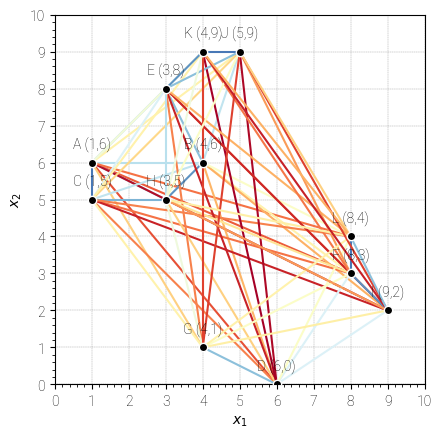

In [6]:
# 归一化距离矩阵
min_d, max_d = Pairwise_d.min(), Pairwise_d.max()
normalized_distances = (Pairwise_d - min_d) / (max_d - min_d)

## 设置图形
fig, ax = plt.subplots()

# 绘制每条线段，根据距离长度映射颜色
for i, (point1, point2) in enumerate(itertools.combinations(range(len(X)), 2)):
    dist = Pairwise_d[point1, point2]  # 从距离矩阵中获取距离
    color = cm.RdYlBu_r(normalized_distances[point1, point2])  # 使用热图一致的颜色映射
    plt.plot([X[point1, 0], X[point2, 0]], [X[point1, 1], X[point2, 1]], color=color)

# 绘制示例数据的散点图
plt.scatter(x=X[:, 0], y=X[:, 1], color='k', alpha=1.0, zorder = 1000,
            linewidth=1, edgecolor=[1,1,1])

# 添加标签到每个数据点
for i, (x, y) in enumerate(zip(X[:, 0], X[:, 1])):
    label = labels[i] + ' ' + f"({x},{y})"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# 设置坐标轴和网格
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
ax.set_aspect('equal')
plt.show()

## 计算成对距离矩阵并绘制热图

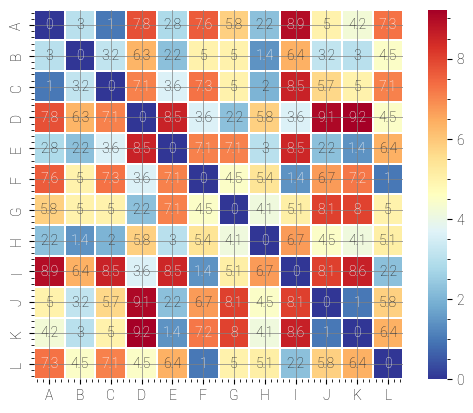

In [7]:
fig, ax = plt.subplots()

# 使用coolwarm颜色映射绘制热图
h = sns.heatmap(Pairwise_d, cmap="RdYlBu_r",
                square=True, linewidths=.05, annot=True,
                xticklabels=labels, yticklabels=labels)
plt.show()

## 绘制三角矩阵

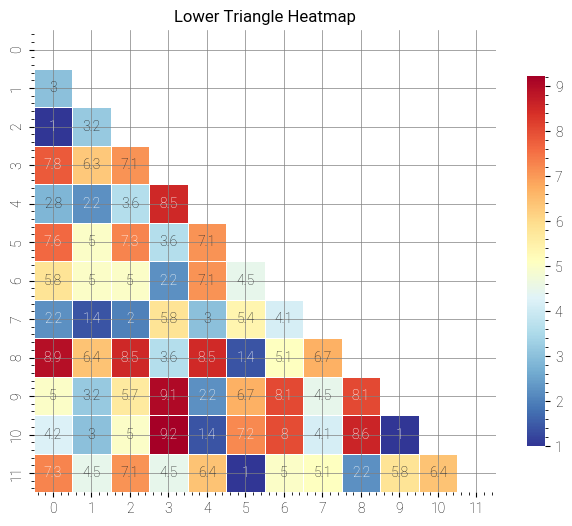

In [8]:
# 掩盖上三角
mask = np.triu(np.ones_like(Pairwise_d, dtype=bool))

# 绘制热图
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(Pairwise_d, mask=mask, cmap="RdYlBu_r", annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
plt.title("Lower Triangle Heatmap")
plt.show()

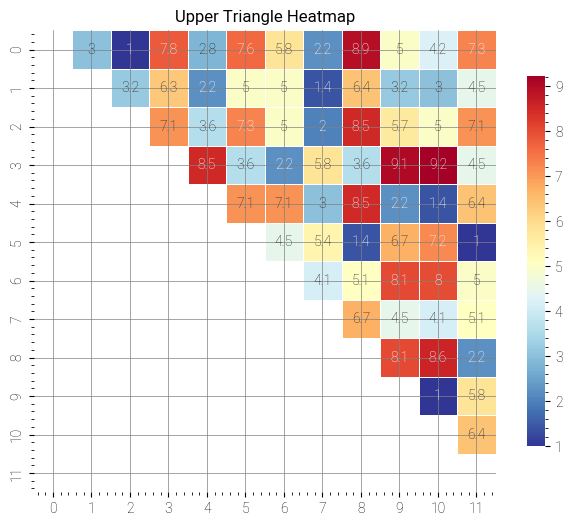

In [10]:
# 掩盖下三角
mask = np.tril(np.ones_like(Pairwise_d, dtype=bool))

# 绘制热图
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(Pairwise_d, mask=mask, cmap="RdYlBu_r", annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
plt.title("Upper Triangle Heatmap")
plt.show()